## DoorDash Stock Analysis (Cleaning Version)

Import the basic function and the csv file `DASH_A1.csv`.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Cleaning
Change the format of the date and make them to the index

In [3]:
# Re-loading the dataset to clean from scratch with user's preferred format
df= pd.read_csv("DASH_A1.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df

/tmp/ipykernel_75826/3999022131.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


,Close,High,Low,Open,Volume
Date,,,,,
2022-02-24,100.419998,100.919998,85.177002,86.879997,6639000.0
2024-08-01,108.199997,112.769997,105.905998,108.620003,7965400.0
2025-02-11,193.089996,194.000000,189.500000,190.919998,6771900.0
2021-04-13,149.460007,150.360001,143.550003,146.839996,2823500.0
2024-09-17,129.880005,131.369995,126.900002,131.350006,2825500.0
...,...,...,...,...,...
2024-11-27,178.440002,180.179993,177.699997,179.990005,2031100.0
2025-02-12,200.889999,201.169998,195.197998,198.000000,9989400.0
2025-04-01,182.419998,183.014999,178.259995,182.050003,3740700.0


In [4]:
df.index.is_monotonic_increasing 

df.sort_index(inplace=True) 
df


,Close,High,Low,Open,Volume
Date,,,,,
2020-12-09,189.509995,195.500000,163.800003,182.000000,25373700.0
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-11,175.000000,182.000000,168.250000,176.520004,4760600.0
2020-12-14,160.000000,170.000000,151.199997,169.100006,7859600.0
2020-12-15,158.889999,161.419998,153.759995,157.100006,5017000.0
...,...,...,...,...,...
2025-06-09,217.490005,219.830002,216.955002,218.029999,2710300.0
2025-06-10,214.970001,219.210007,210.927002,216.589996,3916700.0
2025-06-11,217.800003,219.529999,212.240005,214.184998,3091500.0


In [5]:
df.duplicated().sum()

df.drop_duplicates(inplace=True) 
df

df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

Close     23
High      24
Low       15
Open      15
Volume    26
dtype: int64

In [7]:
condition = df.isnull().any(axis=1)
df[condition]

,Close,High,Low,Open,Volume
Date,,,,,
2020-12-10,186.000000,187.695007,172.636002,179.710007,NaN
2020-12-17,154.210007,161.660004,NaN,159.100006,6369800.0
2021-01-13,NaN,215.500000,188.070007,192.410004,6058800.0
2021-02-05,NaN,190.916000,180.244995,189.570007,1521400.0
2021-03-01,168.889999,173.789993,164.199997,171.440002,NaN
...,...,...,...,...,...
2025-04-11,180.490005,NaN,173.809998,178.520004,3451700.0
2025-04-25,187.759995,191.100006,NaN,187.220001,4515100.0
2025-05-01,196.199997,197.750000,NaN,194.404999,4151600.0


Open Price

In [8]:
df.Open.fillna(df.Close.shift(1),inplace=True)
df.isnull().sum()

/tmp/ipykernel_75826/65237255.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Open.fillna(df.Close.shift(1),inplace=True)


Close     23
High      24
Low       15
Open       0
Volume    26
dtype: int64

Close Price

In [9]:
df.Close.ffill(inplace=True)
df.isnull().sum()

/tmp/ipykernel_75826/1256897760.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Close.ffill(inplace=True)


Close      0
High      24
Low       15
Open       0
Volume    26
dtype: int64

High and Low Price

In [10]:
df["Month"] = df.index.to_period("M")
df
#monthly_mean_high = df.groupby("Month").High.mean()
#monthly_mean_low = df.groupby("Month").Low.mean()

#monthly_mean_high
#monthly_mean_low

for col in ["High", "Low"]:
    for period in df["Month"].unique():
        mask = df["Month"] == period
        monthly_mean = df.loc[mask, col].mean()
        df.loc[mask, col] = df.loc[mask, col].fillna(monthly_mean)

df.isnull().sum()



Close      0
High       0
Low        0
Open       0
Volume    26
Month      0
dtype: int64

Volume (Zero Volume Condition)

In [11]:
condition_equal = (df.Volume.isnull()) & (df.Close == df.Open)
df.loc[condition_equal, "Volume"] = 0
df.isnull().sum()

Close      0
High       0
Low        0
Open       0
Volume    25
Month      0
dtype: int64

Volume (Non-zero Volume Condition):

In [12]:

condition_notequal = (df['Close'] != df['Open']) & (df['Volume'].isna())

df.loc[condition_notequal, 'Volume'] = df['Volume'].median()

df.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
Month     0
dtype: int64

In [13]:
import pandas as pd
import numpy as np

# Assuming 'df' is already cleaned and loaded with correct index and no missing values

# --- Feature Engineering ---

# 1. Simple Daily Returns
df["Daily_Return"] = df["Close"].pct_change()

# 2. Logarithmic Returns
df["Log_Return"] = np.log(df["Close"] / df["Close"].shift(1))

# 3. 20-Day Momentum
df["Momentum_20"] = df["Close"] - df["Close"].shift(20)

# 4. 20-Day Simple Moving Average
df["SMA_20"] = df["Close"].rolling(window=20).mean()

# 5. 20-Day Rolling Volatility
df["Volatility_20"] = df["Daily_Return"].rolling(window=20).std()

# 6. Day of the Week
df["Day_of_Week"] = df.index.day_name()

# 7. Price Surge Identification (> 4 std dev above mean daily return)
mean_return = df["Daily_Return"].mean()
std_return = df["Daily_Return"].std()
df["Price_Surge"] = df["Daily_Return"] > (mean_return + 4 * std_return)

# 8. Volume Spike Identification (> 6 std dev above mean volume)
mean_volume = df["Volume"].mean()
std_volume = df["Volume"].std()
df["Volume_Spike"] = df["Volume"] > (mean_volume + 6 * std_volume)

# 9. Bollinger Bands
df["BB_Upper"] = df["SMA_20"] + 2 * df["Volatility_20"]
df["BB_Lower"] = df["SMA_20"] - 2 * df["Volatility_20"]




In [14]:
# Daily return and 20-day rolling volatility
df["Daily_Return"] = df["Close"].pct_change()
df["Volatility_20"] = df["Daily_Return"].rolling(window=20).std()

# Extract year from date
df["Year"] = df.index.year


In [15]:
key_dates = []

for year, group in df.groupby("Year"):
    if group.empty:
        continue

    data = {
        "Year": year,
        "Highest Volatility Day": group["Volatility_20"].idxmax(),
        "Volatility Value": group["Volatility_20"].max(),
        "Largest Price Surge Day": group["Daily_Return"].idxmax(),
        "Surge Value": group["Daily_Return"].max(),
        "Largest Price Drop Day": group["Daily_Return"].idxmin(),
        "Drop Value": group["Daily_Return"].min(),
        "Highest Volume Day": group["Volume"].idxmax(),
        "Volume Value": group["Volume"].max(),
        "Highest High Day": group["High"].idxmax(),
        "High Value": group["High"].max(),
        "Lowest Low Day": group["Low"].idxmin(),
        "Low Value": group["Low"].min(),
        "Annual Open": group.iloc[0]["Open"],
        "Annual Close": group.iloc[-1]["Close"]
    }
    key_dates.append(data)

key_dates_df = pd.DataFrame(key_dates)
key_dates_df


/tmp/ipykernel_75826/2576056421.py:9: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  "Highest Volatility Day": group["Volatility_20"].idxmax(),


,Year,Highest Volatility Day,Volatility Value,Largest Price Surge Day,Surge Value,Largest Price Drop Day,Drop Value,Highest Volume Day,Volume Value,Highest High Day,High Value,Lowest Low Day,Low Value,Annual Open,Annual Close
0,2020,NaT,NaN,2020-12-18,0.078724,2020-12-14,-0.085714,2020-12-09,25373700.0,2020-12-09,195.500000,2020-12-31,135.380005,182.000000,142.750000
1,2021,2021-05-20,0.067393,2021-05-14,0.221491,2021-02-22,-0.135457,2021-03-09,20400000.0,2021-11-15,257.250000,2021-05-13,110.129997,142.500000,148.899994
2,2022,2022-06-01,0.080994,2022-03-16,0.134512,2022-05-11,-0.131621,2022-02-17,47405700.0,2022-01-12,152.494995,2022-10-24,41.365002,149.610001,48.820000
3,2023,2023-11-06,0.047470,2023-11-02,0.156653,2023-02-17,-0.075946,2023-12-15,30556000.0,2023-12-11,103.980003,2023-01-06,45.931999,49.980000,98.889999
4,2024,2024-02-27,0.033547,2024-08-02,0.083457,2024-05-02,-0.103170,2024-05-02,22134800.0,2024-12-17,181.779999,2024-01-04,93.330002,97.800003,167.750000
5,2025,2025-04-10,0.048324,2025-04-09,0.137738,2025-04-03,-0.080634,2025-03-21,73637400.0,2025-06-06,220.880005,2025-04-07,155.399994,168.789993,218.119995


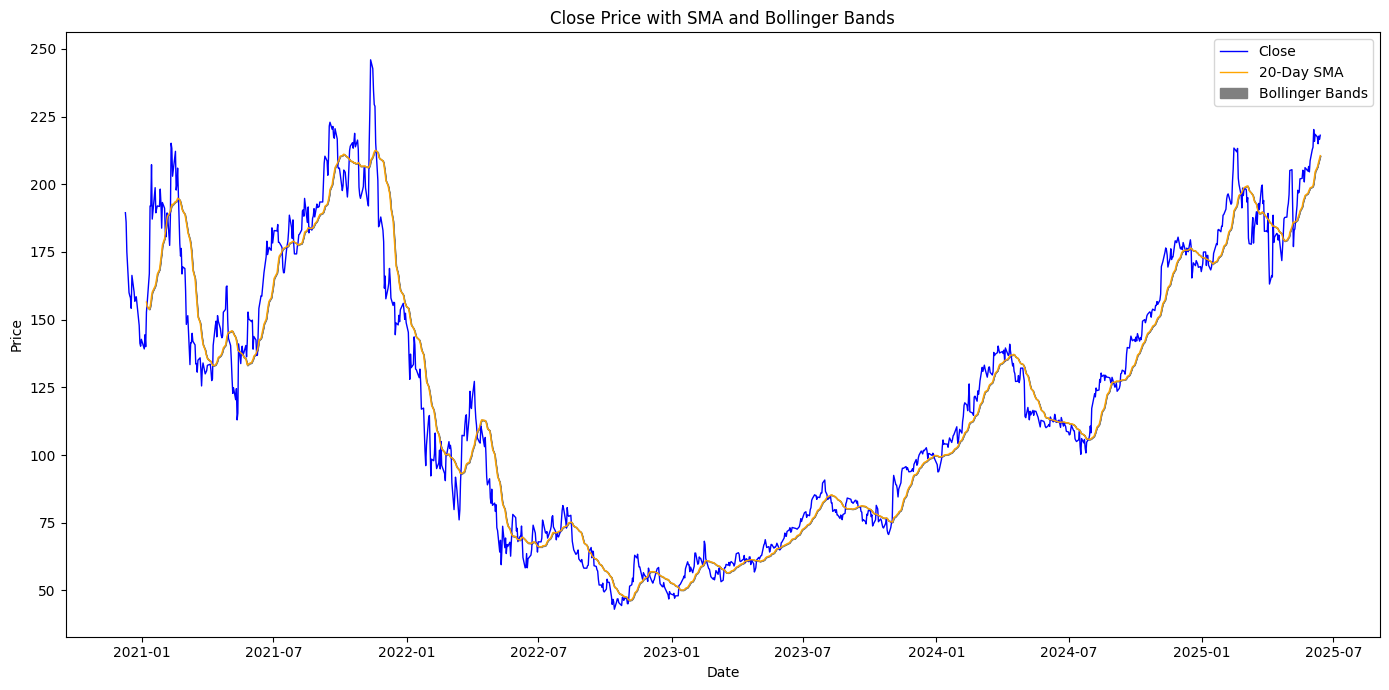

In [16]:
# 1. Close Price with SMA and Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(df.index, df["Close"], label="Close", color="blue", linewidth=1)
plt.plot(df.index, df["SMA_20"], label="20-Day SMA", color="orange", linewidth=1)
plt.fill_between(df.index, df["BB_Upper"], df["BB_Lower"], color="gray", alpha=1, label="Bollinger Bands")
plt.title("Close Price with SMA and Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()


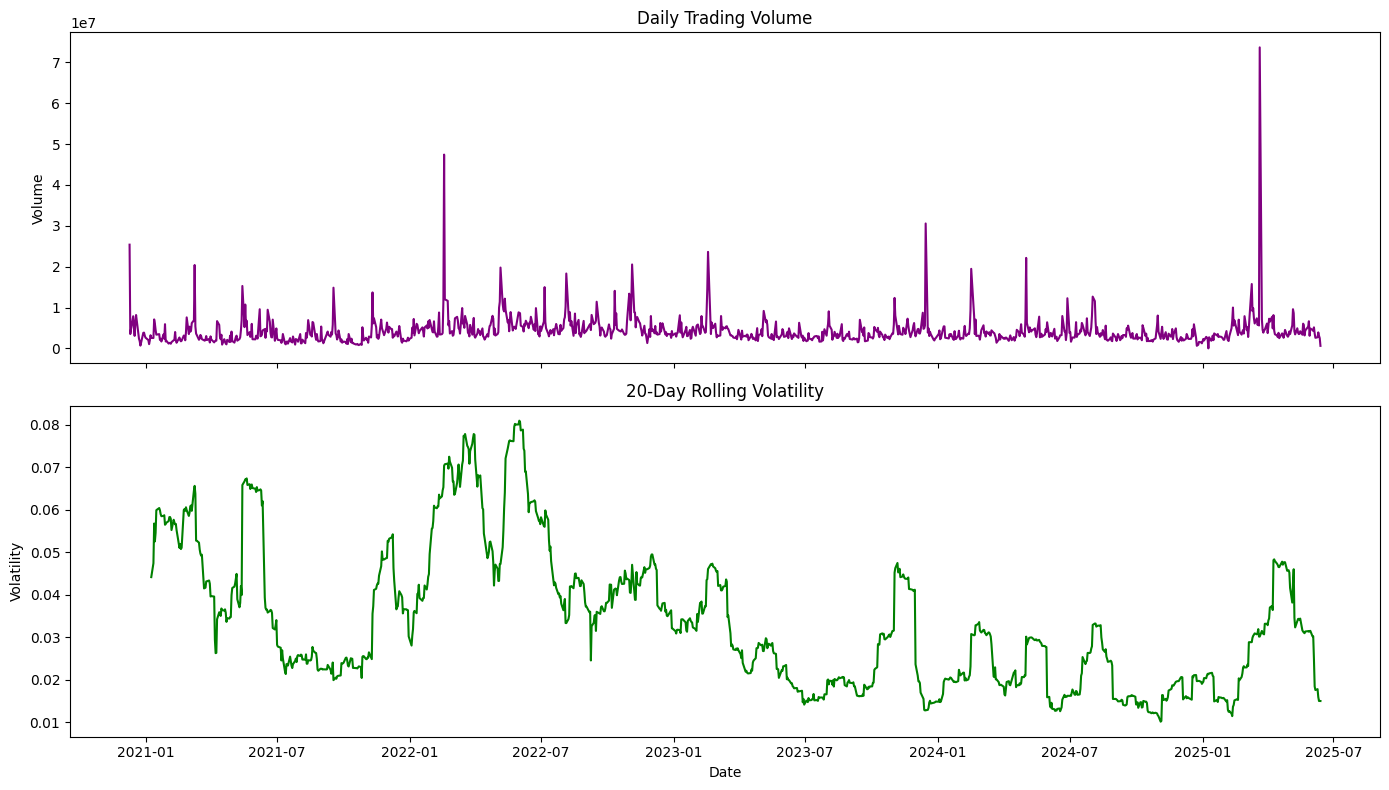

In [17]:
# 2. Volume and Volatility Subplots
df["Daily_Return"] = df["Close"].pct_change()
df["Volatility_20"] = df["Daily_Return"].rolling(window=20).std()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
ax1.plot(df.index, df["Volume"], color="purple")
ax1.set_title("Daily Trading Volume")
ax1.set_ylabel("Volume")
ax2.plot(df.index, df["Volatility_20"], color="green")
ax2.set_title("20-Day Rolling Volatility")
ax2.set_ylabel("Volatility")
plt.xlabel("Date")
plt.tight_layout()
plt.show()


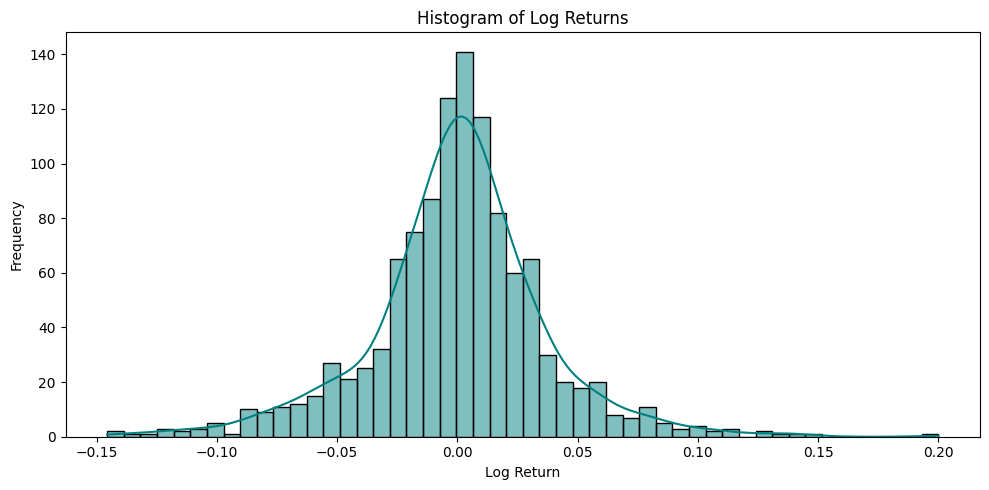

In [18]:
# 3. Histogram of Log Returns
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(df["Log_Return"].dropna(), bins=50, kde=True, color='teal')
plt.title("Histogram of Log Returns")
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


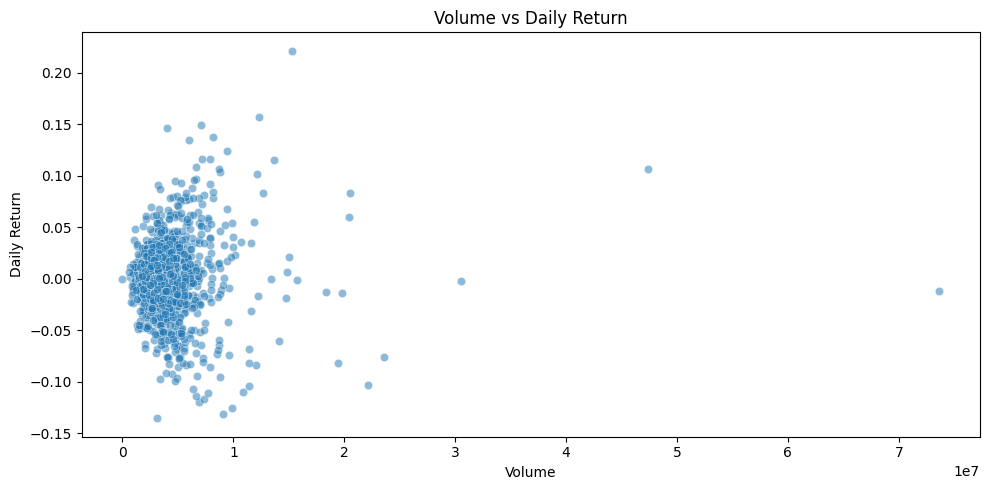

In [19]:
# 4. Scatter Plot: Volume vs Daily Return
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Volume", y="Daily_Return", data=df, alpha=0.5)
plt.title("Volume vs Daily Return")
plt.xlabel("Volume")
plt.ylabel("Daily Return")
plt.tight_layout()
plt.show()
